# Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/preprocessed_data.csv')  # Replace with your file path
print(data.head())

       Date     Close      Open      High       Low    Volume        RSI  \
0  1/1/1996 -1.046165 -1.083570 -1.085930 -1.079582  0.337264  39.353761   
1  1/2/1996 -1.049181 -1.082062 -1.086034 -1.085620  0.690979  39.353761   
2  1/3/1996 -1.051627 -1.086270 -1.088946 -1.086330  1.036026  39.353761   
3  1/4/1996 -1.051936 -1.092406 -1.094352 -1.089491  1.541763  39.353761   
4  1/5/1996 -1.052434 -1.090653 -1.094699 -1.087716  1.272621  39.353761   

       MACD  MACD Signal  Upper_Bollinger_Band  ...   wk_close     wk_rsi  \
0  0.981558     0.770101             12.104294  ...  11.397689  76.940763   
1  0.981558     0.770101             12.104294  ...  11.397689  76.940763   
2  0.981558     0.770101             12.104294  ...  11.397689  76.940763   
3  0.981558     0.770101             12.104294  ...  11.397689  76.940763   
4  0.981558     0.770101             12.104294  ...  11.397689  76.940763   

    wk_macd  mon_close    mon_rsi  mon_macd  rolling_mean_close  \
0  1.060967  

In [2]:
# Summary of data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   6791 non-null   object 
 1   Close                  6791 non-null   float64
 2   Open                   6791 non-null   float64
 3   High                   6791 non-null   float64
 4   Low                    6791 non-null   float64
 5   Volume                 6791 non-null   float64
 6   RSI                    6791 non-null   float64
 7   MACD                   6791 non-null   float64
 8   MACD Signal            6791 non-null   float64
 9   Upper_Bollinger_Band   6791 non-null   float64
 10  Middle_Bollinger_Band  6791 non-null   float64
 11  Lower Bollinger Band   6791 non-null   float64
 12  ADX                    6791 non-null   float64
 13  Stochastic SlowK       6791 non-null   float64
 14  Stochastic SlowD       6791 non-null   float64
 15  wk_c

In [3]:
# Statistical summary of numerical features
print(data.describe())

              Close          Open          High           Low        Volume  \
count  6.791000e+03  6.791000e+03  6.791000e+03  6.791000e+03  6.791000e+03   
mean   8.688011e-12 -2.945713e-13 -8.835130e-12 -1.177950e-12 -3.092362e-12   
std    1.000074e+00  1.000074e+00  1.000074e+00  1.000074e+00  1.000074e+00   
min   -1.068145e+00 -1.122314e+00 -1.122981e+00 -1.119681e+00 -9.068680e-01   
25%   -9.932820e-01 -1.017722e+00 -1.020458e+00 -1.015864e+00 -5.341168e-01   
50%   -3.046550e-02  5.329360e-03  1.073950e-02  5.940378e-03 -3.082174e-01   
75%    6.747021e-01  6.812609e-01  6.799441e-01  6.836728e-01  1.567043e-01   
max    3.544266e+00  3.426794e+00  3.399833e+00  3.429799e+00  1.180792e+01   

               RSI         MACD  MACD Signal  Upper_Bollinger_Band  \
count  6791.000000  6791.000000  6791.000000           6791.000000   
mean     51.958283     0.590231     0.588755            156.765576   
std      13.011696     4.822832     4.548538            135.744098   
min     

# Distribution of Key Features


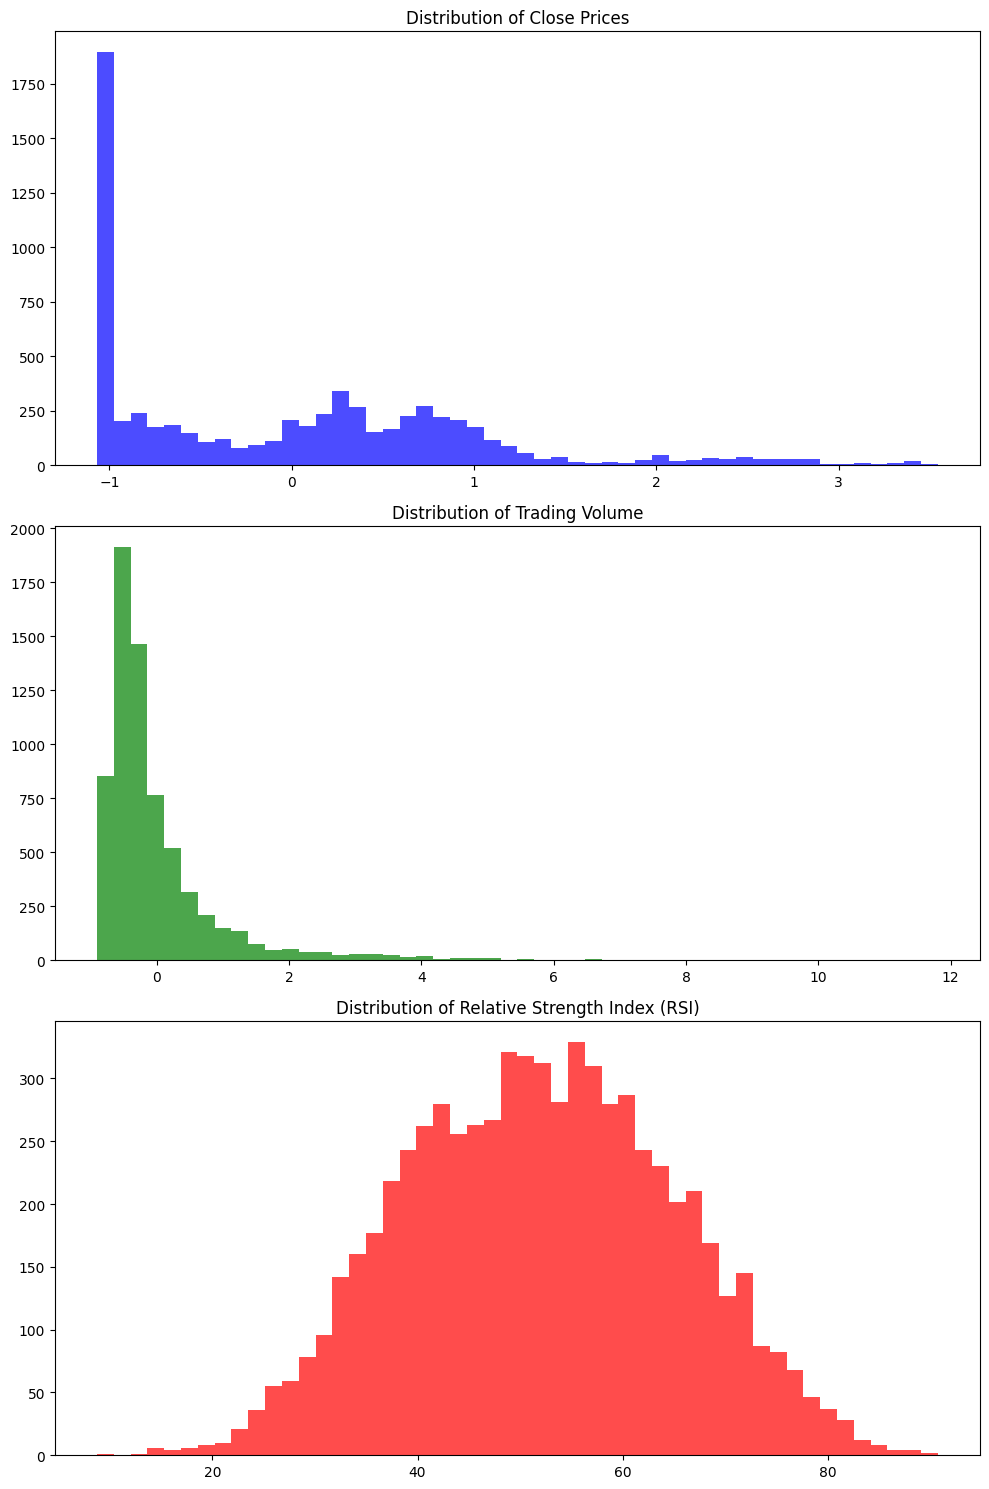

In [7]:
import matplotlib.pyplot as plt

# Plotting distributions of key features
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of 'Close'
axes[0].hist(data['Close'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Close Prices')

# Distribution of 'Volume'
axes[1].hist(data['Volume'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Distribution of Trading Volume')

# Distribution of 'RSI'
axes[2].hist(data['RSI'], bins=50, color='red', alpha=0.7)
axes[2].set_title('Distribution of Relative Strength Index (RSI)')

plt.tight_layout()

# Save the plot as an image
plt.savefig('key_features_distribution.png', dpi=300)
plt.show()

#  Correlation Matrix

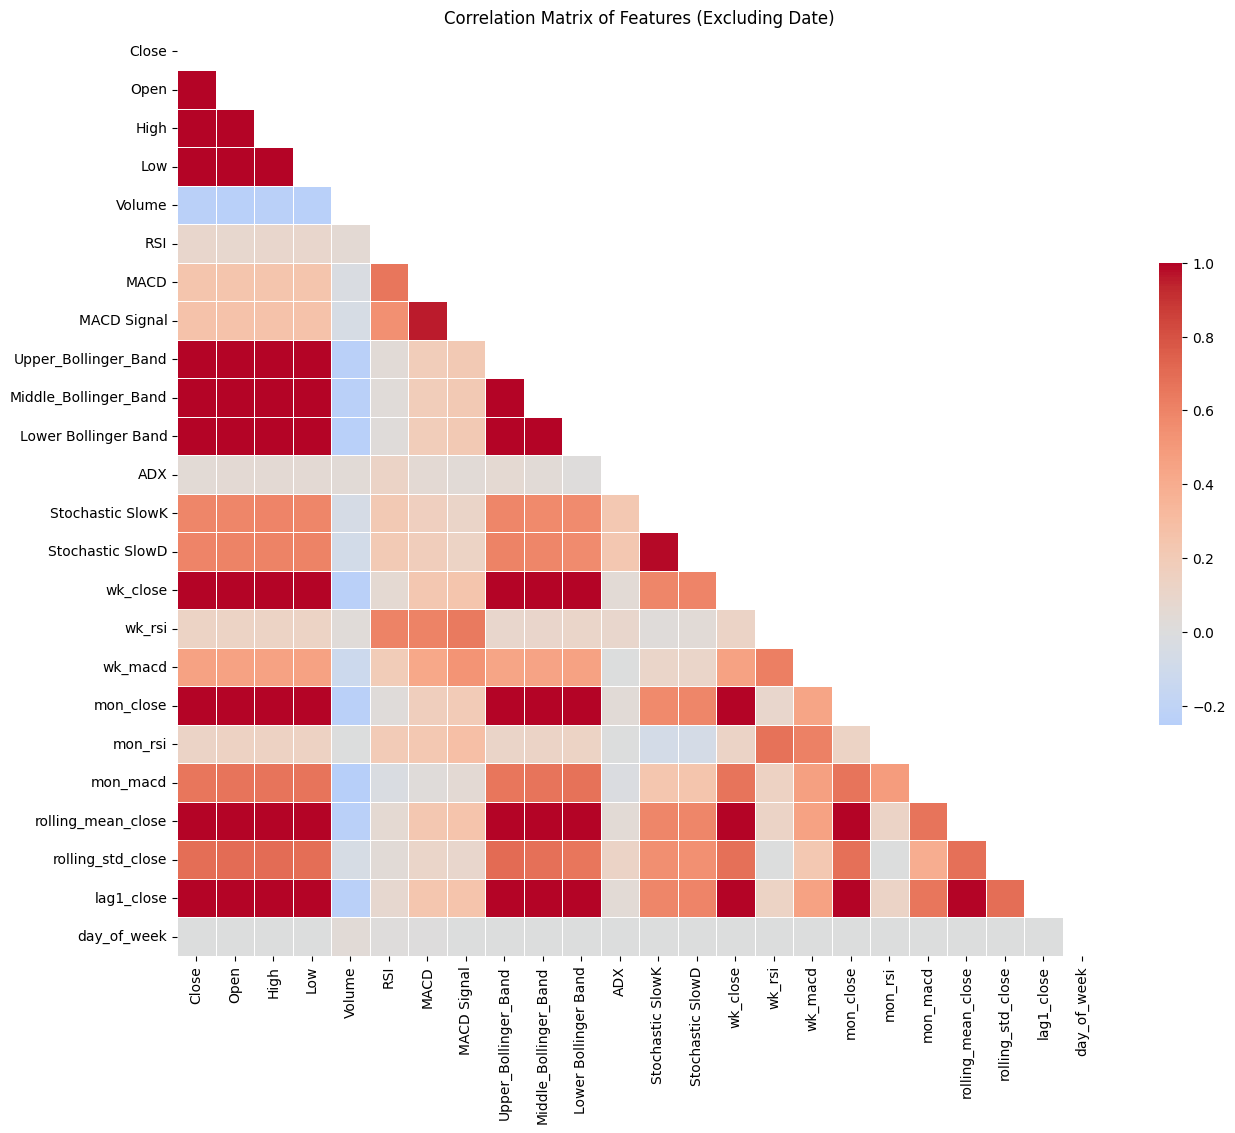

In [8]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix, excluding the 'Date' column
corr = data.drop('Date', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Matrix of Features (Excluding Date)')

# Save the plot as an image
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

# Time Series Trends of Key Features


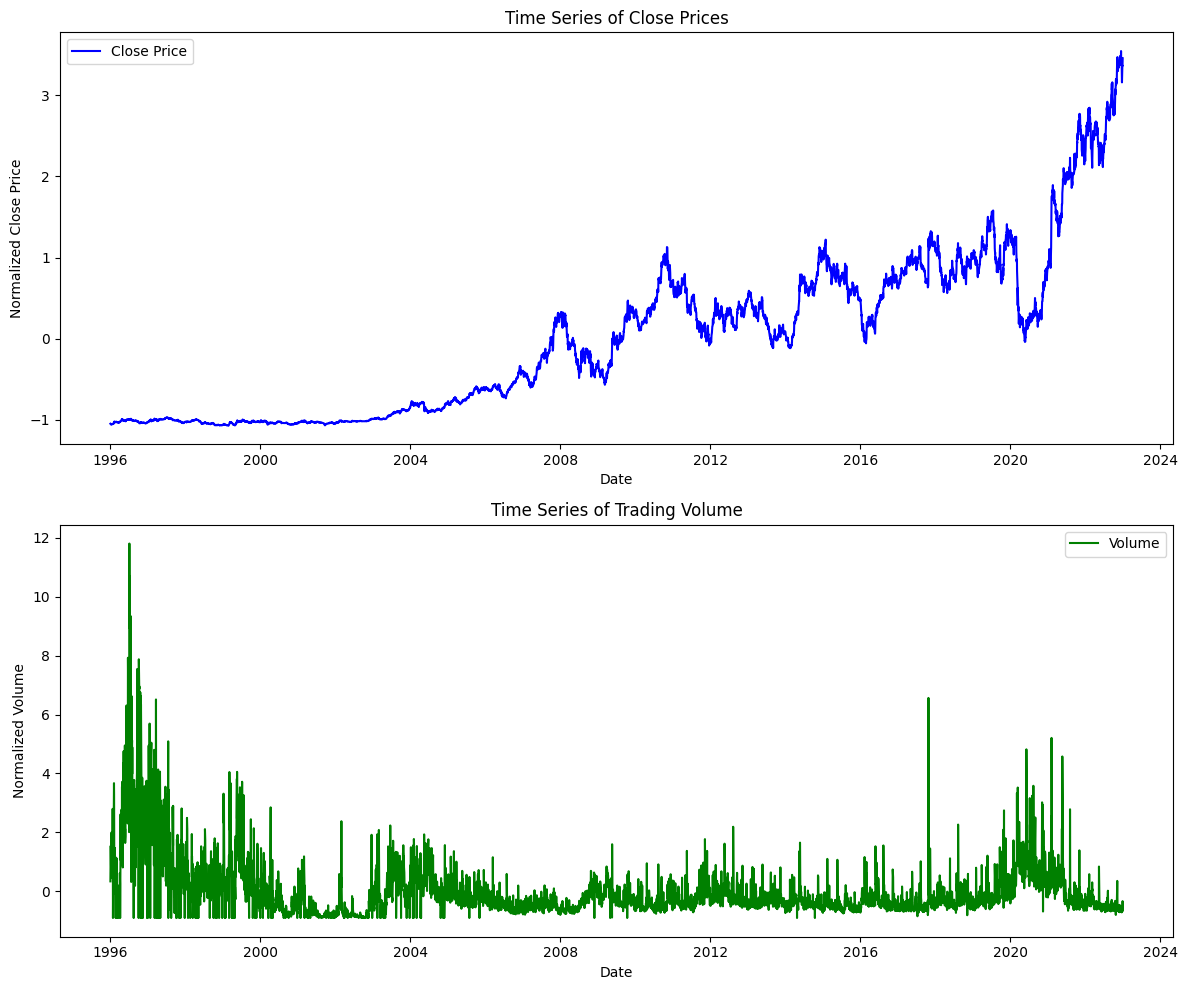

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting time series trends for 'Close' prices and 'Volume'
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Time Series of 'Close'
axes[0].plot(data['Date'], data['Close'], label='Close Price', color='blue')
axes[0].set_title('Time Series of Close Prices')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Normalized Close Price')
axes[0].legend()

# Time Series of 'Volume'
axes[1].plot(data['Date'], data['Volume'], label='Volume', color='green')
axes[1].set_title('Time Series of Trading Volume')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Normalized Volume')
axes[1].legend()

plt.tight_layout()

# Save the plot as an image
plt.savefig('time_series_trends.png', dpi=300)
plt.show()

# Box Plots for Weekly and Monthly Variations

<ipython-input-11-4b23350db6e7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Week', y='Close', data=data, ax=axes[0], palette='coolwarm')
<ipython-input-11-4b23350db6e7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Close', data=data, ax=axes[1], palette='viridis')


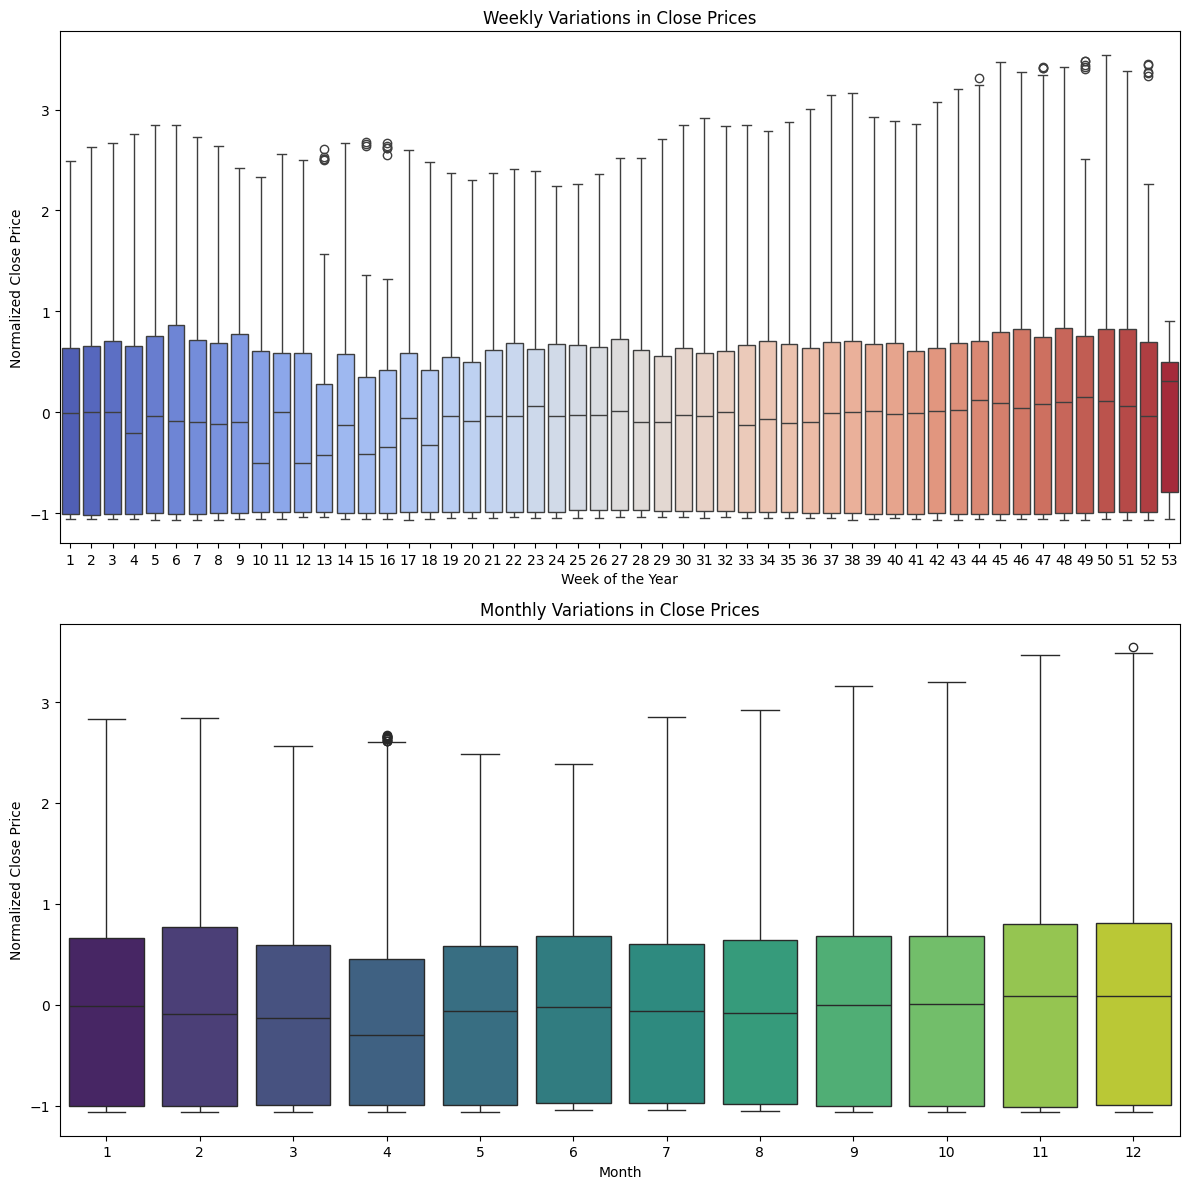

In [11]:
import seaborn as sns

# Creating new features for week and month from 'Date'
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month

# Plotting box plots for weekly and monthly variations
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False)

# Weekly box plot
sns.boxplot(x='Week', y='Close', data=data, ax=axes[0], palette='coolwarm')
axes[0].set_title('Weekly Variations in Close Prices')
axes[0].set_xlabel('Week of the Year')
axes[0].set_ylabel('Normalized Close Price')

# Monthly box plot
sns.boxplot(x='Month', y='Close', data=data, ax=axes[1], palette='viridis')
axes[1].set_title('Monthly Variations in Close Prices')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Normalized Close Price')

plt.tight_layout()

# Save the plot as an image
plt.savefig('weekly_monthly_variations.png', dpi=300)
plt.show()

#  Autocorrelation Analysis

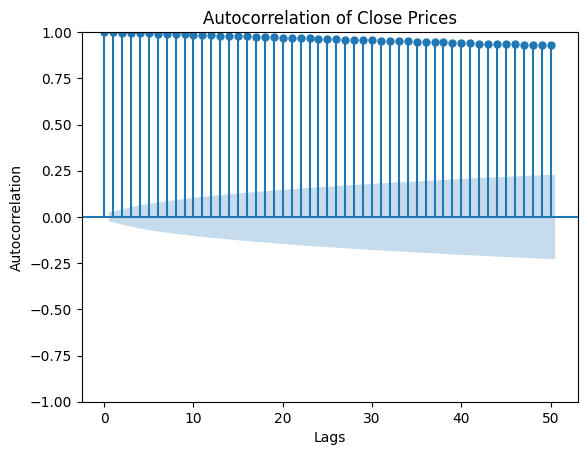

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot for 'Close'
plot_acf(data['Close'], lags=50)
plt.title('Autocorrelation of Close Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# Save the plot as an image
plt.savefig('autocorrelation_close_prices.png', dpi=300)
plt.show()

# Trend and Seasonality Decomposition

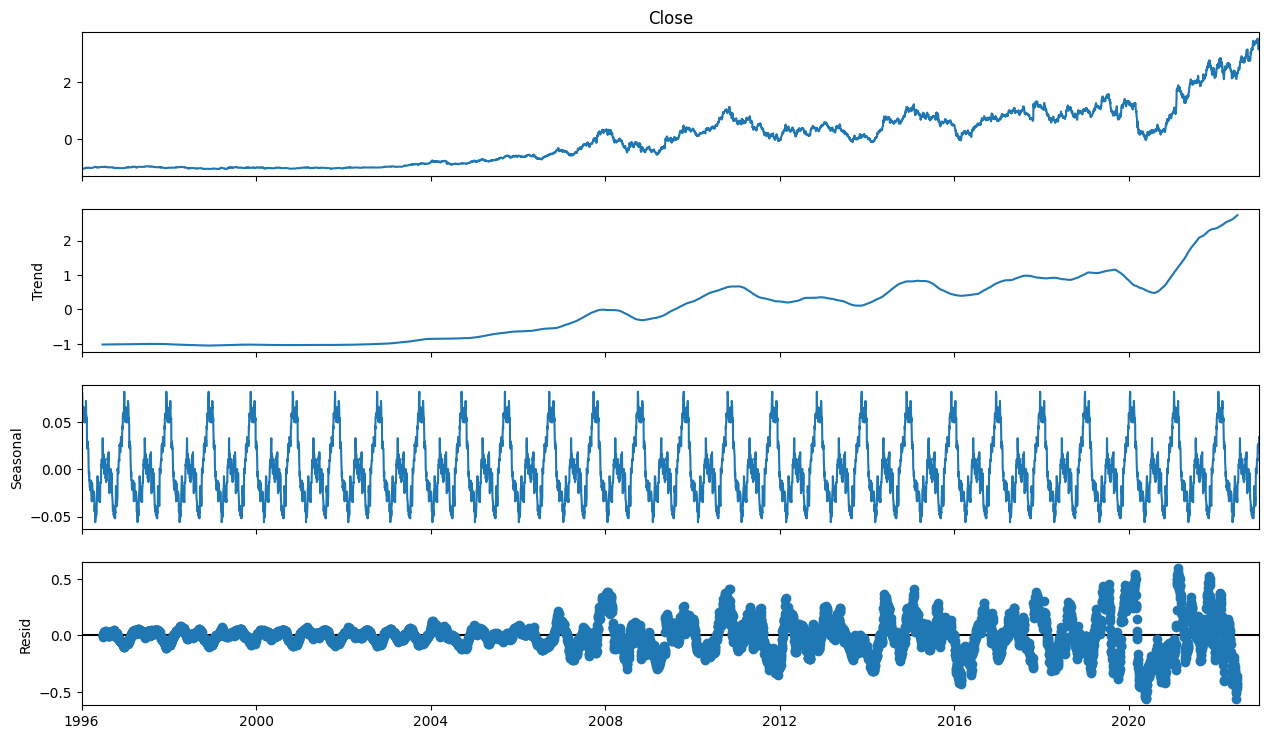

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the 'Date' column is in datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Decompose 'Close' column to trend, seasonal, and residual components
result = seasonal_decompose(data['Close'], model='additive', period=252)  # yearly period for financial data
fig = result.plot()
fig.set_size_inches(14, 8)

# Save the decomposition plot
plt.savefig('trend_seasonality_decomposition.png', dpi=300)
plt.show()

# Pair Plot to Visualize Relationships

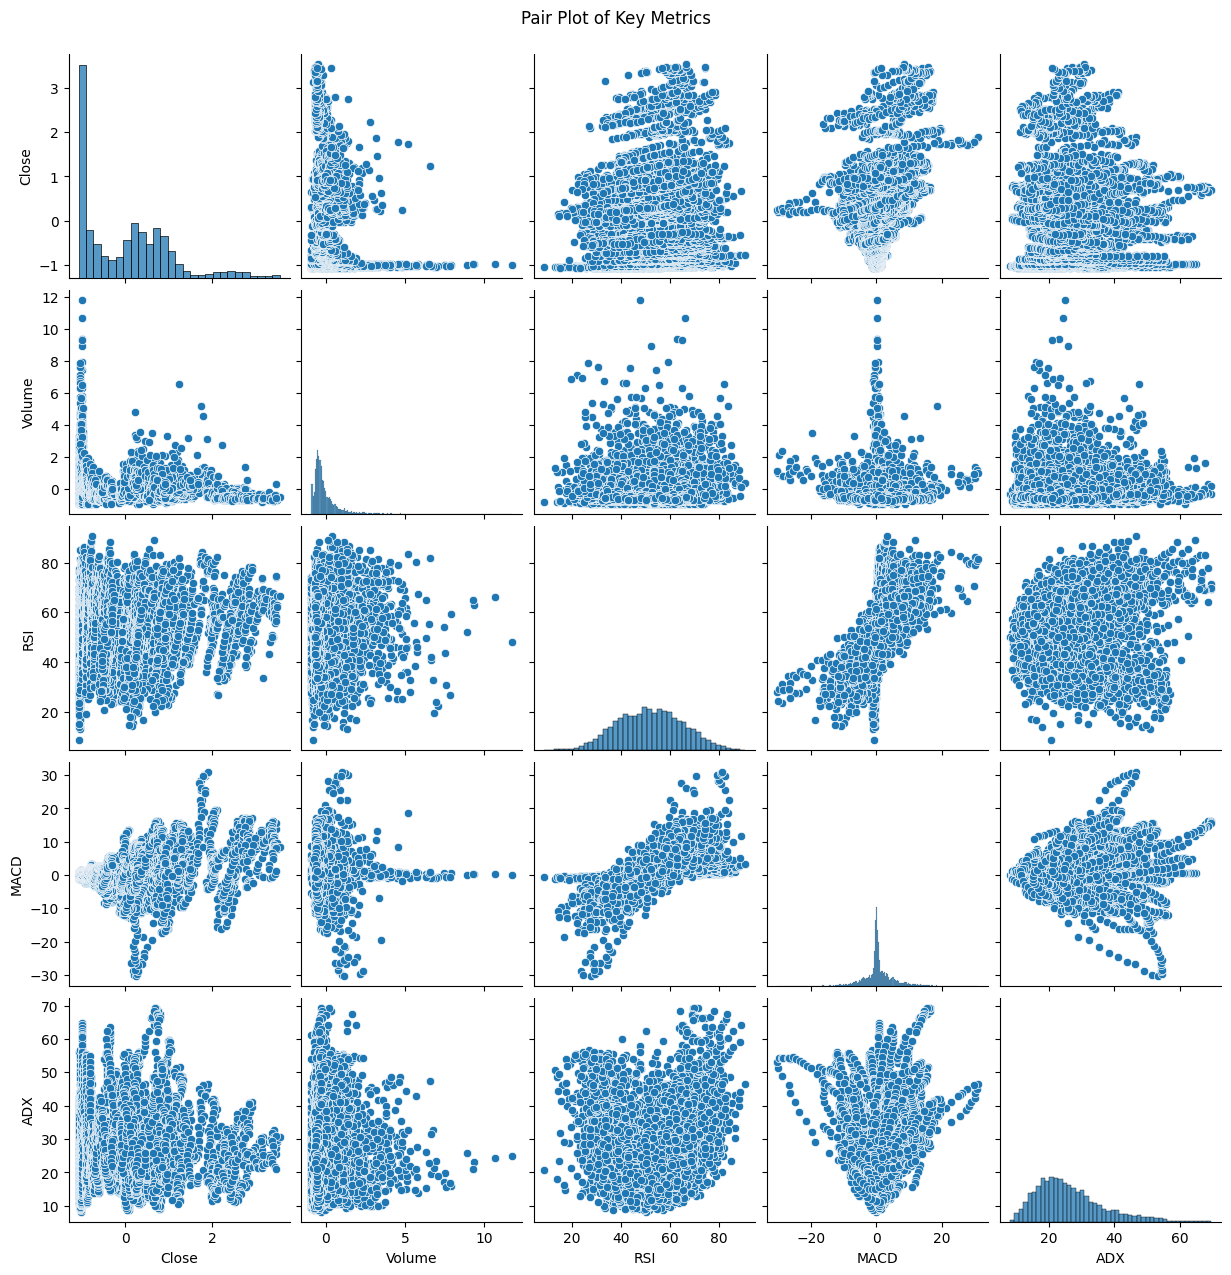

In [14]:
import seaborn as sns

# Select a subset of columns for the pair plot to avoid clutter
subset_columns = ['Close', 'Volume', 'RSI', 'MACD', 'ADX']
sns_pair_plot = sns.pairplot(data[subset_columns])
sns_pair_plot.fig.suptitle("Pair Plot of Key Metrics", y=1.02)

# Save the pair plot
sns_pair_plot.savefig('pair_plot_key_metrics.png')

#  Outlier Detection

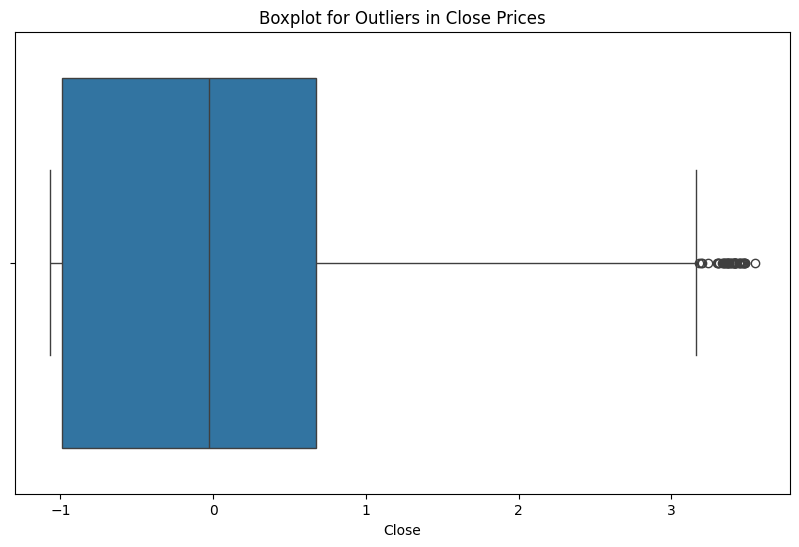

In [15]:
import seaborn as sns

# Boxplot to identify outliers in 'Close'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Close'])
plt.title('Boxplot for Outliers in Close Prices')

# Save the boxplot
plt.savefig('outliers_close_prices.png', dpi=300)
plt.show()

# Moving Averages

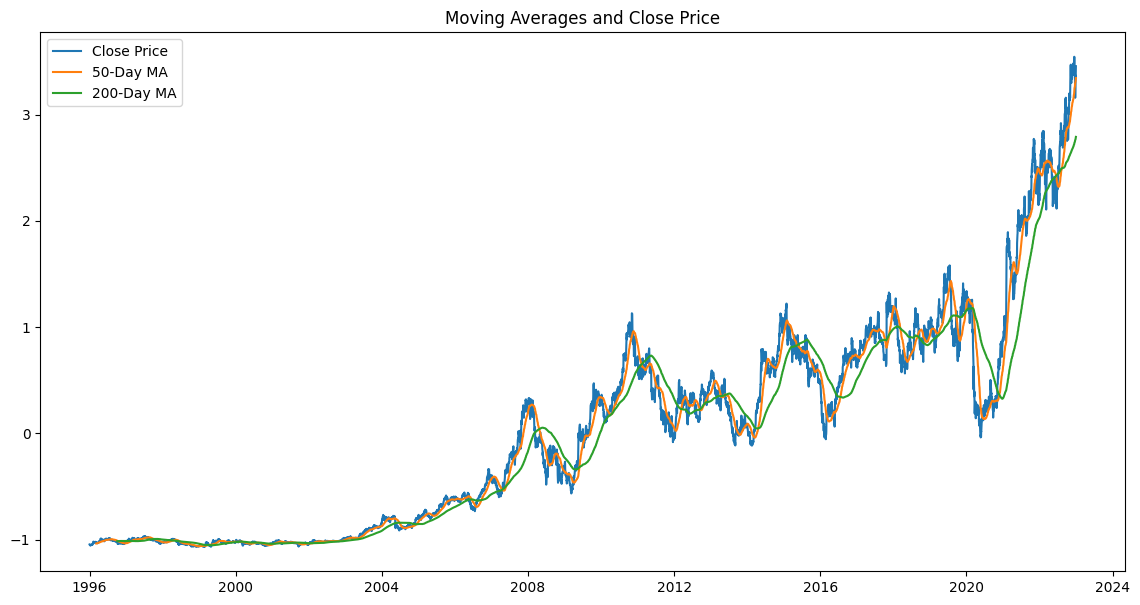

In [16]:
# Calculate moving averages for the 'Close' price
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['MA_200'] = data['Close'].rolling(window=200).mean()  # 200-day moving average

# Plot moving averages along with 'Close' price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_50'], label='50-Day MA')
plt.plot(data['MA_200'], label='200-Day MA')
plt.title('Moving Averages and Close Price')
plt.legend()

# Save the moving averages plot
plt.savefig('moving_averages_close_price.png', dpi=300)
plt.show()


# SAVING THE FILE

In [9]:
from google.colab import files
files.download('key_features_distribution.png')
files.download('correlation_matrix.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from google.colab import files

# List of filenames of the saved plots
plot_files = [
    'time_series_trends.png',
    'weekly_monthly_variations.png',
    'autocorrelation_close_prices.png',
    'trend_seasonality_decomposition.png',
    'pair_plot_key_metrics.png',
    'outliers_close_prices.png',
    'moving_averages_close_price.png',
]

# Loop through the files and trigger a download
for file in plot_files:
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis for stock trends

In [21]:
import pandas as pd

# Load your data again if necessary
data = pd.read_csv('/content/preprocessed_data.csv')

# Check if 'Date' is among the DataFrame columns or index
if 'Date' not in data.columns:
    if 'Date' in data.index.names:
        data.reset_index(inplace=True)  # Resets the index and makes 'Date' a column
    else:
        print("No 'Date' column found. Please check the DataFrame columns.")

# Now, ensure 'Date' is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# 1. Moving Average Convergence Divergence (MACD)

## MACD Calculation and Plotting

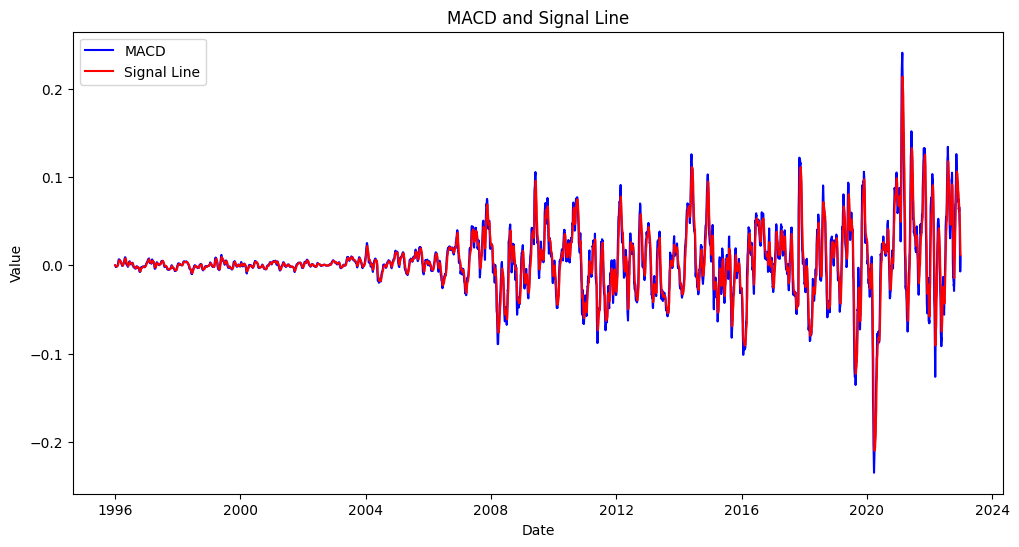

In [22]:
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['Signal_Line'], label='Signal Line', color='red')
plt.legend()
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.savefig('macd_signal_line.png', dpi=300)
plt.show()

#

# 2. Bollinger Bands

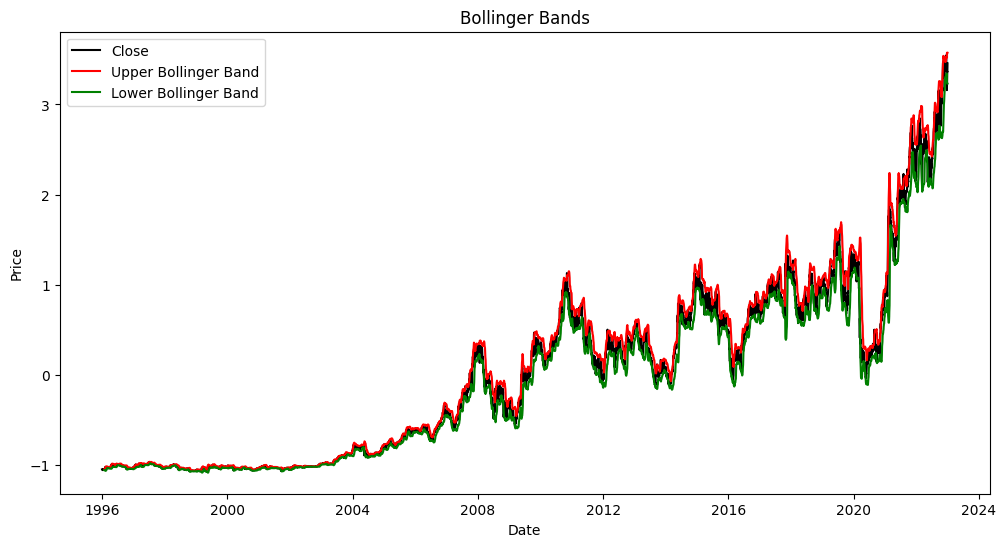

In [23]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STD_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA_20'] + (data['STD_20'] * 2)
data['Lower_Band'] = data['SMA_20'] - (data['STD_20'] * 2)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close', color='black')
plt.plot(data['Date'], data['Upper_Band'], label='Upper Bollinger Band', color='red')
plt.plot(data['Date'], data['Lower_Band'], label='Lower Bollinger Band', color='green')
plt.fill_between(data['Date'], data['Upper_Band'], data['Lower_Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('bollinger_bands.png', dpi=300)
plt.show()

# 3. Relative Strength Index (RSI)

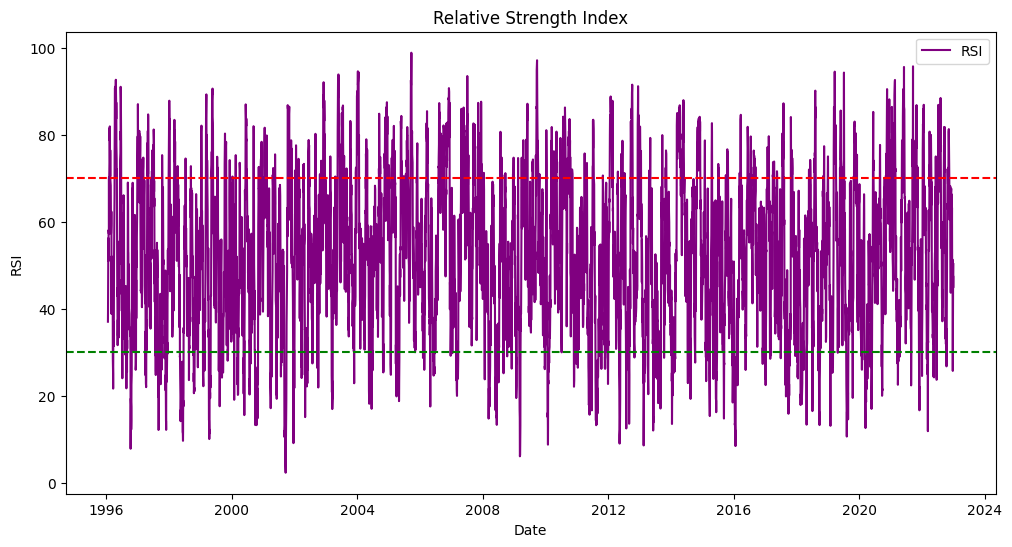

In [39]:
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.savefig('rsi_chart.png', dpi=300)  # Save the figure
plt.show()

In [40]:
from google.colab import files

# List of plot files to download
files_to_download = ['macd_signal_line.png', 'bollinger_bands.png', 'rsi_chart.png']

# Download each file
for file_name in files_to_download:
    files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>